## 신경망
신경망을 그림으로 나타내면 아래와 같다.

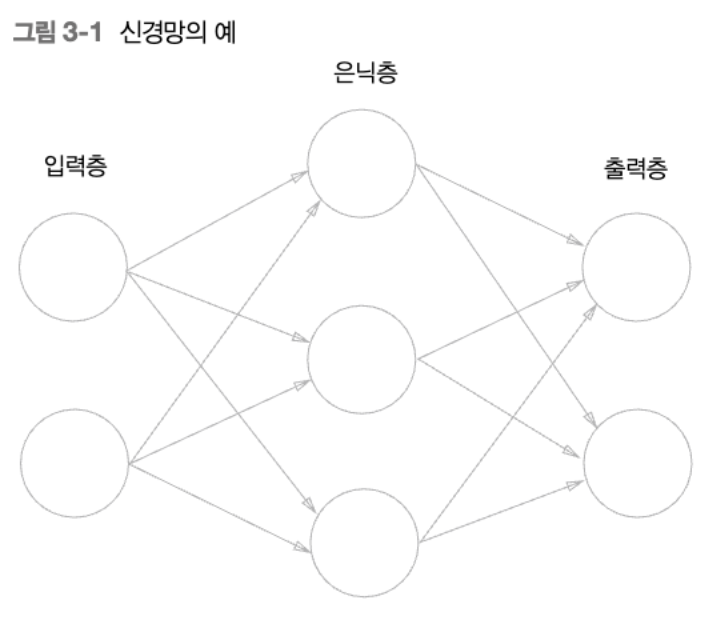

[구성 요소]
- 가장 왼쪽 줄 : 입력층
- 맨 오른쪽 줄 : 출력층
- 중간 줄 : 은닉층

---
### 퍼셉트론의 정보 전달
아래와 같은 구조의 네트워크가 존재한다고 생각해보자.

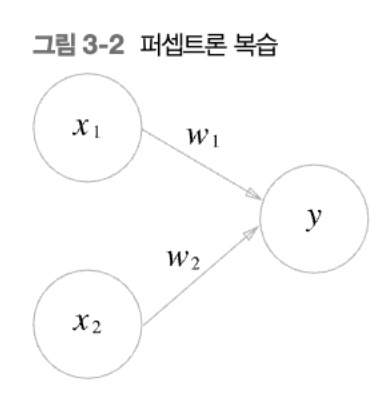

위 네트워크는 x1과 x2라는 신호를 입력받아 y를 출력하는 퍼셉트론이다. 이를 수식으로 나타내면 아래와 같다.
$$
y = 
\begin{cases} 
0 & \text{} (b + w_1 x_1 + w_2 x_2 \leq \theta) \\
1 & \text{} (b + w_1 x_1 + w_2 x_2 > \theta)
\end{cases}
$$

- b는 편향으로, 뉴런이 얼마나 쉽게 활성화되느냐를 제어
- w1, w2는 가중치로, 각 신호의 영향력을 제어

하지만 위 그림에서는 편향 b가 보이지 않는다. 여기에 편향을 명시한다면 아래 그림과 같다.

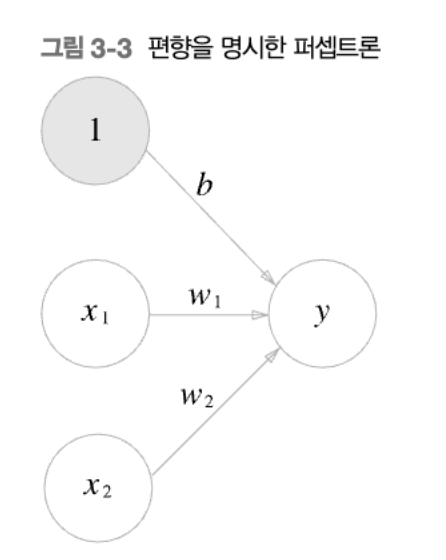

## 활성화 함수의 등장
- 활성화 함수 : 입력 신호의 총합을 출력 신호로 변환하기 위한 도구

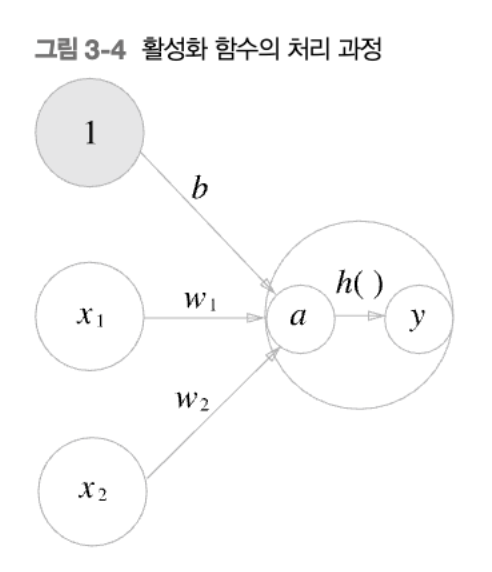

위 그림에서는 기존 뉴런의 원을 키우고, 그 안에 활성화 함수의 처리 과정을 명시적으로 그려 넣었다

[정리]
- 가중치 신호를 조합한 결과 : a 노드
- 활성화 함수 : h()

위 a 노드와 h() 함수를 통과하여 y라는 노드로 최종 변환된다.

### 계단함수
활성화 함수는 계단함수라고도 불린다.

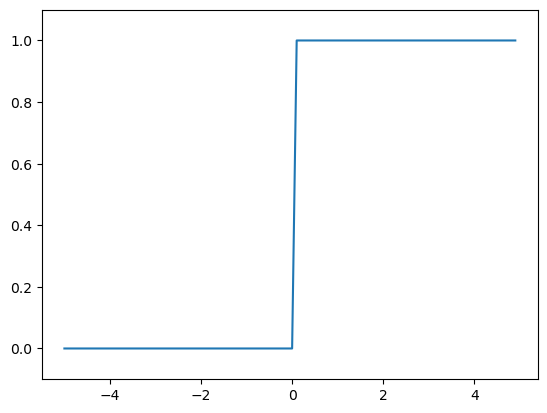

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# int 설정
np.int = np.int32

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

활성화 함수는 0을 경계로 출력이 0에서 1사이 값으로 바꿔주며, 그래프의 생김새가 위와 같다.

위 그림처럼 값이 바뀌는 형태가 계단처럼 생겼기에 '계단 함수'로도 불린다.

## 시그모이드 함수
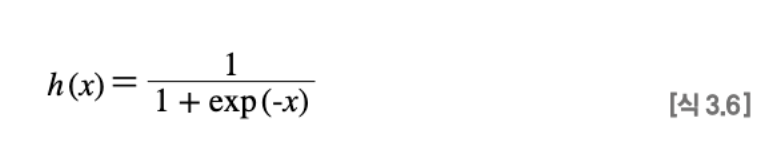

시그모이드 함수에 1.0과 2.0을 입력하면 h(1.0) = 0.731...., h(2.0) = 0.880.... 처럼 특정 값을 출력한다

신경망에서는 활성화 함수로 시그모이드 함수를 사용해 신호를 변환하고 그 변환된 신호를 다음 뉴런에 전달한다

In [5]:
# 시그모이드 함수 구현하기
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

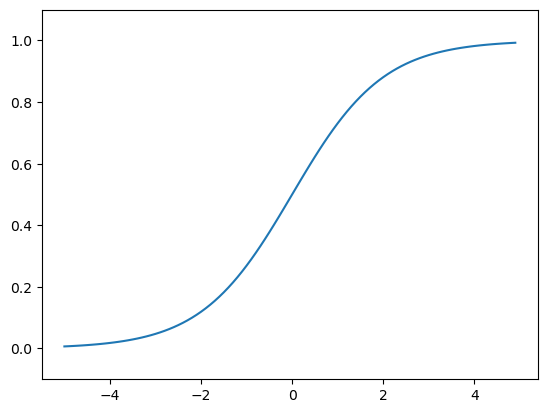

In [6]:
# 시그모이드 함수를 그래프로 확인하기
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

## 비선형 함수
- 계단 함수와 시그모이드 함수의 공통점 : 둘 모두는 비선형 함수다.

신경망에서는 활성화 함수로 반드시 '비선형 함수'를 사용해야한다. (다르게 말하면 선형 함수를 사용하면 안된다)
-> 그 이유는 선형 함수를 사용하면 신경망의 층을 깊게 하는 의미가 없어지기 떄문이다.

### Example
선형 함수인 h(x) = cx를 활성화 함수로 사용한 3층 네트워크 -> 식으로 나타내면 아래와 같다.
$$
y(x) = 
h(h(h(x)))
$$


이 계산은 y(x) = c * c * c * x 처럼 곱셈을 세번 수행하지만 실은 아래와 똑같은 식이 된다.
$$
y(x) = 
ax
$$


하지만 위 식은 결국 a = c^3이라고 하면 끝이다. 

따라서 은닉층이 없는 네트워크로 표현할 수 있기 때문이다.


## ReLU 함수

[ReLU의 작동 방식]
- 입력이 0을 넘는다 -> 그 입력 그대로 출력
- 입력이 0 이하이다 -> 그냥 0을 출력

아래 ReLU 함수의 그래프를 통해 쉽게 이해 가능하다.

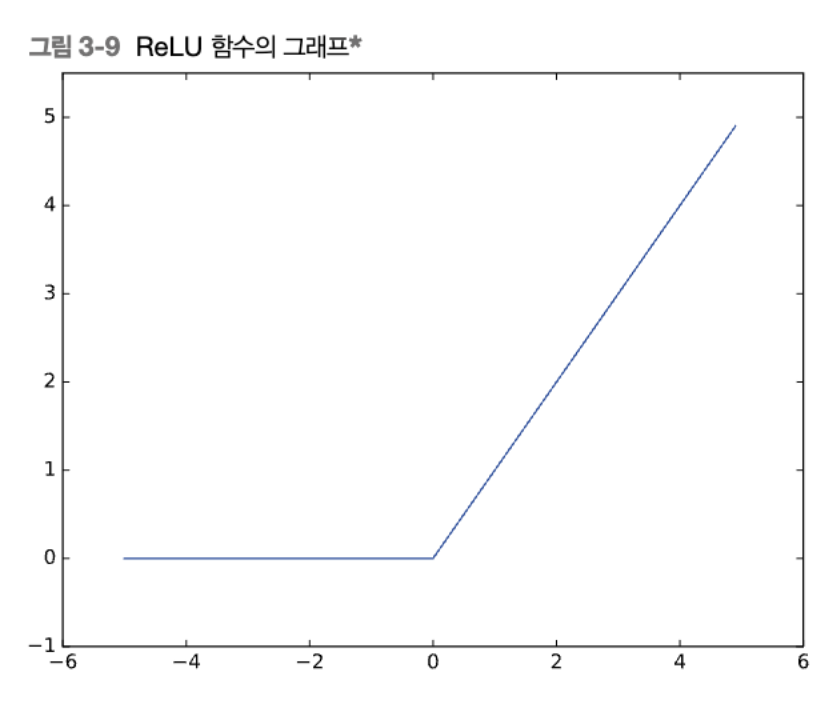

수식으로는 아래 처럼 쓸 수 있다.
$$
h(x) = 
\begin{cases} 
x & \text{} (x > 0) \\
0 & \text{} (x \leq 0)
\end{cases}
$$

In [8]:
# maximum : 두 입력 중 큰 값을 선택해 반환하는 함수
def relu(x):
    return np.maximum(0, x)